In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import metrics 


In [2]:
dataset = pd.read_csv("D://assignments//Assignment 16//Gas_turbines.csv")
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
dataset.shape

(15039, 11)

In [4]:
dataset.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
dataset[dataset.duplicated()].shape

(0, 11)

In [7]:
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
cd=dataset

In [9]:
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [10]:
df=norm_func(cd)

In [11]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087


In [12]:
bd= df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)

In [13]:
bd.head()

,AT,AP,AH,TEY
0,0.184182,0.456050,0.951314,0.195191
1,0.182020,0.466391,0.955881,0.195459
2,0.185295,0.474664,0.939003,0.195325
3,0.189922,0.482937,0.929126,0.195459
4,0.199830,0.493278,0.927708,0.195459


In [14]:
predictors = bd.iloc[:,[0,1,2]]
target = bd.iloc[:,3]

In [15]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25)

In [17]:
first_model = prep_model([3,50,1])
first_model.fit(np.array(x_train),np.array(y_train),epochs=200)
pred_train = first_model.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-y_train)**2))
np.corrcoef(pred_train,y_train)

Epoch 1/200
353/353 [==============================] - 1s 679us/step - loss: 0.0569 - accuracy: 1.1700e-05
Epoch 2/200
353/353 [==============================] - 0s 651us/step - loss: 0.0425 - accuracy: 2.1302e-05
Epoch 3/200
353/353 [==============================] - 0s 784us/step - loss: 0.0418 - accuracy: 6.6713e-05
Epoch 4/200
353/353 [==============================] - 0s 664us/step - loss: 0.0394 - accuracy: 1.2978e-04
Epoch 5/200
353/353 [==============================] - 0s 631us/step - loss: 0.0401 - accuracy: 1.1128e-04
Epoch 6/200
353/353 [==============================] - 0s 625us/step - loss: 0.0402 - accuracy: 3.8001e-05
Epoch 7/200
353/353 [==============================] - 0s 656us/step - loss: 0.0397 - accuracy: 4.3396e-06
Epoch 8/200
353/353 [==============================] - 0s 651us/step - loss: 0.0397 - accuracy: 7.0505e-05
Epoch 9/200
353/353 [==============================] - 0s 653us/step - loss: 0.0391 - accuracy: 4.6016e-06
Epoch 10/200
353/353 [===============

Epoch 77/200
353/353 [==============================] - 0s 662us/step - loss: 0.0377 - accuracy: 8.4251e-05
Epoch 78/200
353/353 [==============================] - 0s 688us/step - loss: 0.0382 - accuracy: 2.2258e-05
Epoch 79/200
353/353 [==============================] - 0s 679us/step - loss: 0.0382 - accuracy: 3.2076e-05
Epoch 80/200
353/353 [==============================] - 0s 659us/step - loss: 0.0377 - accuracy: 1.1216e-04
Epoch 81/200
353/353 [==============================] - 0s 640us/step - loss: 0.0379 - accuracy: 5.7174e-05
Epoch 82/200
353/353 [==============================] - 0s 739us/step - loss: 0.0378 - accuracy: 1.6972e-05
Epoch 83/200
353/353 [==============================] - 0s 668us/step - loss: 0.0373 - accuracy: 1.5608e-04
Epoch 84/200
353/353 [==============================] - 0s 719us/step - loss: 0.0383 - accuracy: 1.0211e-04
Epoch 85/200
353/353 [==============================] - 0s 662us/step - loss: 0.0375 - accuracy: 1.9830e-04
Epoch 86/200
353/353 [======

353/353 [==============================] - 0s 643us/step - loss: 0.0374 - accuracy: 6.2066e-05
Epoch 153/200
353/353 [==============================] - 0s 634us/step - loss: 0.0373 - accuracy: 1.5180e-05
Epoch 154/200
353/353 [==============================] - 0s 631us/step - loss: 0.0383 - accuracy: 2.4740e-04
Epoch 155/200
353/353 [==============================] - 0s 631us/step - loss: 0.0379 - accuracy: 4.2721e-05
Epoch 156/200
353/353 [==============================] - 0s 636us/step - loss: 0.0372 - accuracy: 3.5360e-05
Epoch 157/200
353/353 [==============================] - 0s 631us/step - loss: 0.0376 - accuracy: 1.8725e-04
Epoch 158/200
353/353 [==============================] - 0s 642us/step - loss: 0.0375 - accuracy: 0.0000e+00
Epoch 159/200
353/353 [==============================] - 0s 633us/step - loss: 0.0375 - accuracy: 8.6877e-05
Epoch 160/200
353/353 [==============================] - 0s 651us/step - loss: 0.0375 - accuracy: 2.8217e-04
Epoch 161/200
353/353 [==========

array([[1.        , 0.42854024],
       [0.42854024, 1.        ]])

In [18]:
rmse_value

0.23333943956033715

In [19]:
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))
np.corrcoef(pred_test,y_test)

array([[1.        , 0.41147851],
       [0.41147851, 1.        ]])

In [20]:
rmse_test

0.235439373902045

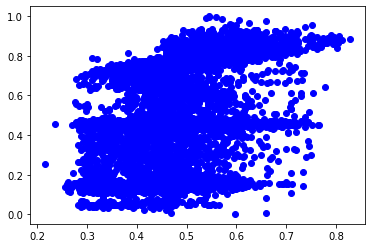

In [22]:
import matplotlib.pyplot as plt
plt.plot(pred_train,y_train,"bo")

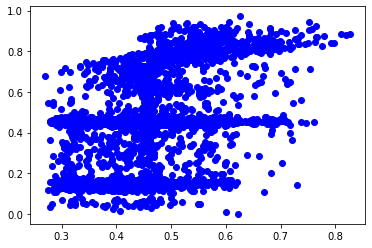

In [23]:
plt.plot(pred_test,y_test,"bo")